In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import patches

In [38]:
inp = np.random.choice(range(10), (5, 5))
filter_conv = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

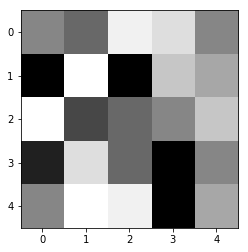

In [39]:
plt.imshow(inp, cmap='Greys')

Text(0.5, 1.0, 'Filter')

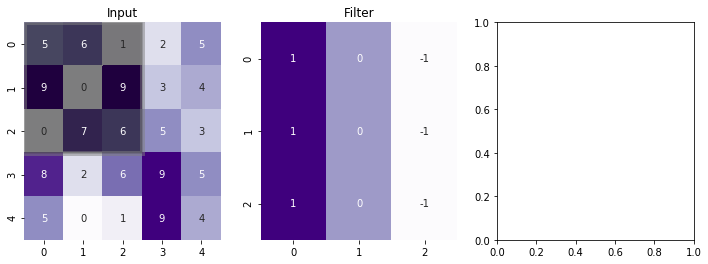

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(12, 4))

sns.heatmap(inp, annot=True, cbar=None, ax=ax[0], cmap='Purples')
sns.heatmap(filter_conv, annot=True, cbar=None, ax=ax[1], cmap='Purples')
g = ax[0]
rect = patches.Rectangle((0,0),3,3,linewidth=5,edgecolor='grey',facecolor='black', alpha=0.5)

# Add the patch to the Axes
g.add_patch(rect)

ax[0].set_title("Input")
ax[1].set_title("Filter")

In [78]:
from scipy.signal import convolve2d

In [86]:
convolve2d(inp, filter_conv, mode='valid')

array([[ 2, -3, -4],
       [ 4,  8, -9],
       [ 0, 14, -1]])

In [37]:
>>> from scipy import signal
>>> from scipy.misc import lena as lena

>>> scharr = np.array([[ -3-3j, 0-10j,  +3 -3j],
...                    [-10+0j, 0+ 0j, +10 +0j],
...                    [ -3+3j, 0+10j,  +3 +3j]]) # Gx + j*Gy
>>> grad = signal.convolve2d(lena, scharr, boundary='symm', mode='same')

ImportError: cannot import name 'lena' from 'scipy.misc' (/home/nipunbatra-pc/anaconda3/lib/python3.7/site-packages/scipy/misc/__init__.py)

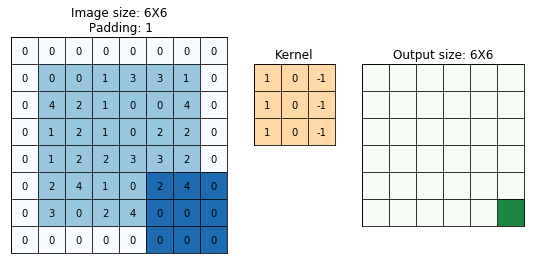

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.animation

#####################
# Array preparation
#####################

#input array
n = 6
p = 1
a = np.random.randint(0, 5, size=(n, n))
# kernel
kernel = np.array([[ 1,0, -1], [1, 0,-1], [ 1,0, -1]])
f = kernel.shape[0]

padding = True

if padding:
    # visualization array (2 bigger in each direction)
    va = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p), dtype=int)
    va[p:-p,p:-p] = a
    va_color = np.zeros((a.shape[0]+2*p, a.shape[1]+2*p)) 
    va_color[p:-p,p:-p] = 0.5
else:
    va = a
    va_color = np.zeros_like(a)

#output array
res = np.zeros((n-f+1+2*p, n-f+1+2*p))



#####################
# Create inital plot
#####################
fig = plt.figure(figsize=(8,4))

def add_axes_inches(fig, rect):
    w,h = fig.get_size_inches()
    return fig.add_axes([rect[0]/w, rect[1]/h, rect[2]/w, rect[3]/h])

axwidth = 3.
cellsize = axwidth/va.shape[1]
axheight = cellsize*va.shape[0]

ax_va  = add_axes_inches(fig, [cellsize, cellsize, axwidth, axheight])
ax_kernel  = add_axes_inches(fig, [cellsize*2+axwidth,
                                   (2+res.shape[0])*cellsize-kernel.shape[0]*cellsize,
                                   kernel.shape[1]*cellsize,  
                                   kernel.shape[0]*cellsize])
ax_res = add_axes_inches(fig, [cellsize*3+axwidth+kernel.shape[1]*cellsize,
                               2*cellsize, 
                               res.shape[1]*cellsize,  
                               res.shape[0]*cellsize])
ax_kernel.set_title("Kernel", size=12)

im_va = ax_va.imshow(va_color, vmin=0., vmax=1.3, cmap="Blues")
ax_va.set_title("Image size: {}X{}\n Padding: {}".format(n, n, p))
for i in range(va.shape[0]):
    for j in range(va.shape[1]):
        ax_va.text(j,i, va[i,j], va="center", ha="center")

ax_kernel.imshow(np.zeros_like(kernel), vmin=-1, vmax=1, cmap="Pastel1")
for i in range(kernel.shape[0]):
    for j in range(kernel.shape[1]):
        ax_kernel.text(j,i, kernel[i,j], va="center", ha="center")


im_res = ax_res.imshow(res, vmin=0, vmax=1.3, cmap="Greens")
res_texts = []
for i in range(res.shape[0]):
    row = []
    for j in range(res.shape[1]):
        row.append(ax_res.text(j,i, "", va="center", ha="center"))
    res_texts.append(row)    

ax_res.set_title("Output size: {}X{}".format(n+2*p-f+1, n+2*p-f+1))

for ax  in [ax_va, ax_kernel, ax_res]:
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    ax.yaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.xaxis.set_major_locator(mticker.IndexLocator(1,0))
    ax.grid(color="k")

###############
# Animation
###############
def init():
    for row in res_texts:
        for text in row:
            text.set_text("")

def animate(ij):
    i,j=ij
    o = kernel.shape[1]//2
    # calculate result
    
   
    res_ij = (kernel*va[1+i-o:1+i+o+1, 1+j-o:1+j+o+1]).sum()
    
    res_texts[i][j].set_text(res_ij)
    # make colors
    c = va_color.copy()
    c[1+i-o:1+i+o+1, 1+j-o:1+j+o+1] = 1.
    im_va.set_array(c)

    r = res.copy()
    r[i,j] = 1
    im_res.set_array(r)
    


i,j = np.indices(res.shape)
ani = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, 
                                         frames=zip(i.flat, j.flat), interval=5)
ani.save("algo.gif", writer="imagemagick")

In [99]:
va

array([[0, 2, 2, 2, 0],
       [4, 3, 0, 2, 2],
       [1, 3, 3, 4, 2],
       [3, 0, 0, 0, 2],
       [0, 3, 4, 2, 3]])

In [100]:
i

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [127]:
i = 0
j = 3
o =kernel.shape[1]//2
(kernel*va[1+i-o:1+i+o+1, 1+j-o:1+j+o+1])

ValueError: operands could not be broadcast together with shapes (3,3) (3,2) 

In [124]:
(kernel)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

In [128]:
va[1+i-o:1+i+o+1, 1+j-o:1+j+o+1]

array([[3, 2],
       [2, 1],
       [3, 0]])